In [72]:
import pandas as pd
import glob, os

In [125]:
def load_files(path, marker):
    files_all = [f for f in os.listdir(path)]

    year = []
    company = []
    for file in files_all:
        batch = file.replace('.csv', '').split(marker)
        company.append(batch[0].replace('_',''))
        year.append(batch[1].replace('_',''))

    year = pd.to_datetime([i[-4:] for i in year]).year

    dock = []
    for file in zip(files_all, year, company):
        load = pd.read_csv(path+file[0])
        load['company'] = file[2]
        load['year'] = file[1]
        load['net_type'] = marker
        dock.append(load)

    return pd.concat(dock)

In [135]:
raw = load_files('../input/dutch-energy/Electricity/', 'electricity')

In [136]:
raw.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,company,year,net_type,ï»¿NETBEHEERDER,STANDAARDDEVIATIE,%Defintieve aansl (NRM)
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19.0,89.47,94.74,89,1x35,4122.0,89.47,0.0,coteq,2013,electricity,NaN,NaN,NaN
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37.0,100.00,100.00,86,1x35,1800.0,94.59,0.0,coteq,2013,electricity,NaN,NaN,NaN
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16.0,100.00,100.00,100,1x35,1315.0,100.00,0.0,coteq,2013,electricity,NaN,NaN,NaN
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25.0,92.00,84.00,44,1x35,6379.0,92.00,0.0,coteq,2013,electricity,NaN,NaN,NaN
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14.0,85.71,100.00,36,1x35,4404.0,92.86,0.0,coteq,2013,electricity,NaN,NaN,NaN


In [137]:
df = raw.copy()

# Break

In [129]:
df.keys()

Index(['net_manager', 'purchase_area', 'street', 'zipcode_from', 'zipcode_to',
       'city', 'num_connections', 'delivery_perc',
       'perc_of_active_connections', 'type_conn_perc', 'type_of_connection',
       'annual_consume', 'annual_consume_lowtarif_perc', 'smartmeter_perc',
       'company', 'year', 'net_type', 'ï»¿NETBEHEERDER', 'STANDAARDDEVIATIE',
       '%Defintieve aansl (NRM)'],
      dtype='object')

In [130]:
df.loc[~df['purchase_area'].isnull()].isnull().mean()

net_manager                     7.815926e-03
purchase_area                   0.000000e+00
street                          0.000000e+00
zipcode_from                    2.883148e-07
zipcode_to                      0.000000e+00
city                            0.000000e+00
num_connections                 2.883148e-06
delivery_perc                   1.446475e-03
perc_of_active_connections      1.446475e-03
type_conn_perc                  4.159143e-02
type_of_connection              2.392321e-02
annual_consume                  0.000000e+00
annual_consume_lowtarif_perc    1.291276e-02
smartmeter_perc                 3.188090e-01
company                         0.000000e+00
year                            0.000000e+00
net_type                        0.000000e+00
ï»¿NETBEHEERDER                 9.921841e-01
STANDAARDDEVIATIE               1.000000e+00
%Defintieve aansl (NRM)         9.933298e-01
dtype: float64

In [131]:
df.isnull().sum()

net_manager                       27109
purchase_area                    235936
street                                0
zipcode_from                          1
zipcode_to                            0
city                                  0
num_connections                      10
delivery_perc                      5017
perc_of_active_connections         5017
type_conn_perc                   144258
type_of_connection                82976
annual_consume                        0
annual_consume_lowtarif_perc      44787
smartmeter_perc                 1105767
company                               0
year                                  0
net_type                              0
ï»¿NETBEHEERDER                 3677258
STANDAARDDEVIATIE               3704367
%Defintieve aansl (NRM)         3681232
dtype: int64

In [132]:
df.loc[df['net_manager'].isnull()]

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,company,year,net_type,ï»¿NETBEHEERDER,STANDAARDDEVIATIE,%Defintieve aansl (NRM)
0,NaN,GAS Gastransport Services (GASUNIE),Poststraat,4301AA,4301AA,ZIERIKZEE,14.0,100.0,100.00,"50,00",G4,3521.0,0.0,7.14,enduris,2017,gas,8.717128e+12,NaN,NaN
1,NaN,GAS Gastransport Services (GASUNIE),Poststraat,4301AB,4301AD,ZIERIKZEE,32.0,100.0,100.00,"71,88",G4,2477.0,0.0,18.75,enduris,2017,gas,8.717128e+12,NaN,NaN
2,NaN,GAS Gastransport Services (GASUNIE),Korte St. Janstraat,4301AE,4301AE,ZIERIKZEE,17.0,100.0,100.00,"94,12",G4,1864.0,0.0,5.88,enduris,2017,gas,8.717128e+12,NaN,NaN
3,NaN,GAS Gastransport Services (GASUNIE),Fonteine,4301AG,4301AH,ZIERIKZEE,31.0,100.0,100.00,"100,00",G4,1324.0,0.0,16.13,enduris,2017,gas,8.717128e+12,NaN,NaN
4,NaN,GAS Gastransport Services (GASUNIE),Lange St. Janstraat,4301AJ,4301AJ,ZIERIKZEE,16.0,100.0,100.00,"100,00",G4,1141.0,0.0,6.25,enduris,2017,gas,8.717128e+12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055,NaN,GAS Gastransport Services (GASUNIE),Dorpsweg,4698RG,4698RG,OUD-VOSSEMEER,24.0,100.0,100.00,"100,00",G4,1190.0,0.0,70.83,enduris,2019,gas,8.717128e+12,NaN,NaN
9056,NaN,GAS Gastransport Services (GASUNIE),Hikseweg,4698RJ,4698RL,OUD-VOSSEMEER,26.0,100.0,96.15,"96,15",G4,1714.0,0.0,69.23,enduris,2019,gas,8.717128e+12,NaN,NaN
9057,NaN,GAS Gastransport Services (GASUNIE),Veerstraat,4698RM,4698RM,OUD-VOSSEMEER,20.0,100.0,95.00,"100,00",G4,1471.0,0.0,70.00,enduris,2019,gas,8.717128e+12,NaN,NaN
9058,NaN,GAS Gastransport Services (GASUNIE),Haven,4698RN,4698RS,OUD-VOSSEMEER,32.0,100.0,100.00,"100,00",G4,1293.0,0.0,71.88,enduris,2019,gas,8.717128e+12,NaN,NaN


<AxesSubplot:xlabel='year'>

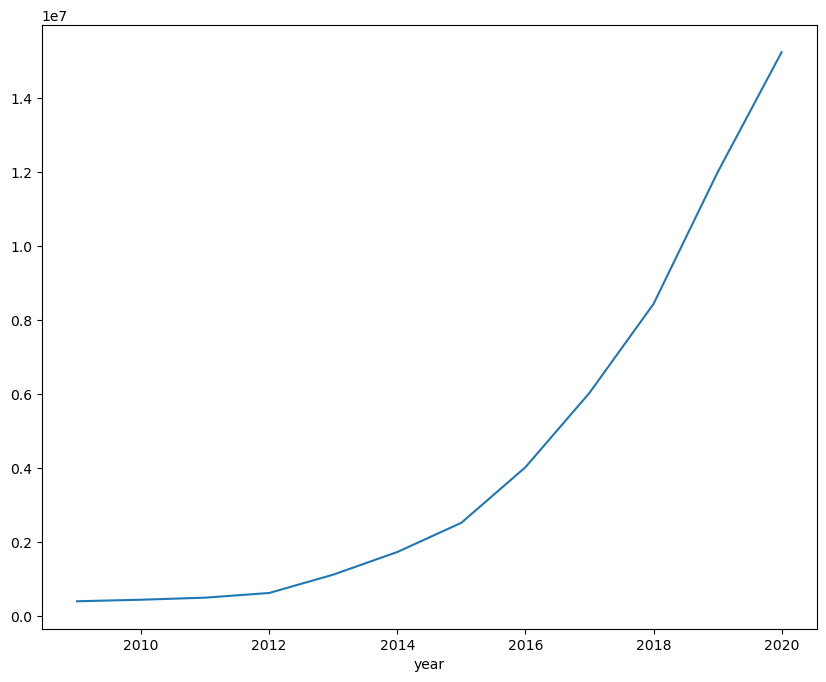

In [133]:
df.groupby(['year'])['smartmeter_perc'].sum().plot()


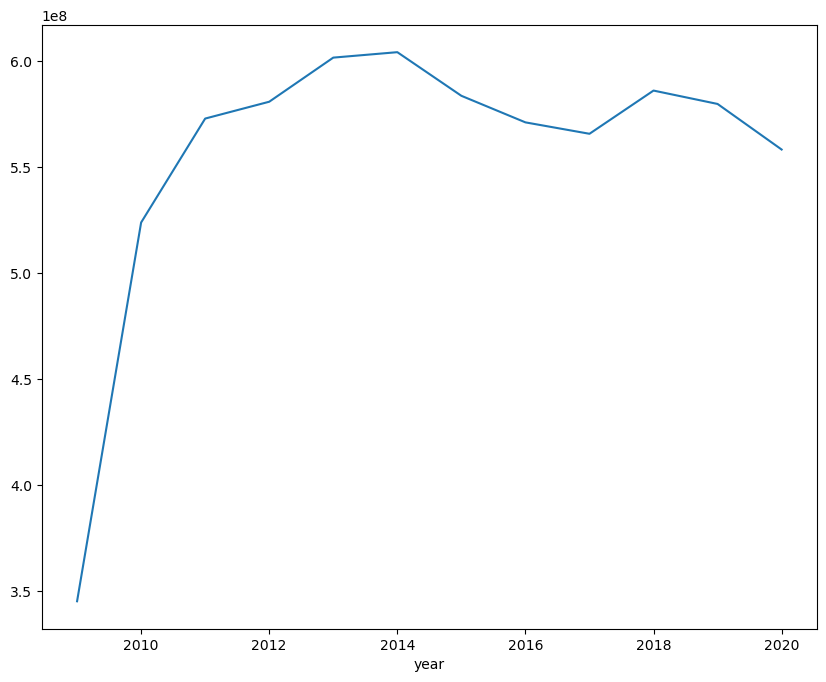

In [134]:
df.groupby(['year'])['annual_consume'].sum().plot();